In [16]:
import warnings
warnings.filterwarnings("ignore")

Cluster
0    2.679167
1    2.584483
2    2.809061
3    2.540123
Name: VisitFrequency, dtype: float64

Cluster
0    0.420833
1    0.601724
2    0.592233
3    0.478395
Name: Female, dtype: float64

Cluster
0    0.043311
1   -0.082059
2   -0.038420
3    0.032404
Name: Like, dtype: float64



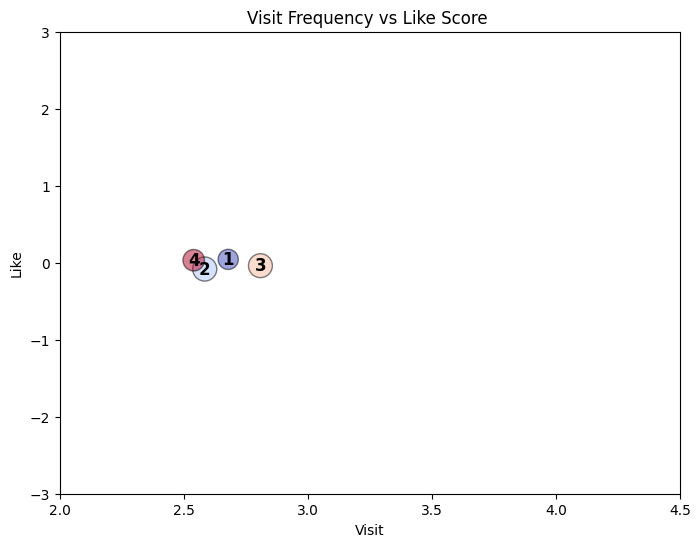

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv("/content/sample_data/mcdonalds.csv")
MD_x = df.iloc[:, :11].applymap(lambda x: 1 if x.strip().lower() == "yes" else 0)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
k4 = kmeans.fit_predict(MD_x)

df["Cluster"] = k4
df["VisitFrequency"] = LabelEncoder().fit_transform(df["VisitFrequency"])
visit_mean = df.groupby("Cluster")["VisitFrequency"].mean()
print(visit_mean)
print()
df["Female"] = (df["Gender"] == "Female").astype(int)
female_mean = df.groupby("Cluster")["Female"].mean()
print(female_mean)
print()
df["Like"] = np.random.uniform(-3, 3, size=len(df))
like_mean = df.groupby("Cluster")["Like"].mean()
print(like_mean)
print()

plt.figure(figsize=(8, 6))
bubble_size = 500 * female_mean
plt.scatter(visit_mean, like_mean, s=bubble_size, alpha=0.5, c=range(4), cmap="coolwarm", edgecolors="k")
for i, (x, y) in enumerate(zip(visit_mean, like_mean)):
    plt.text(x, y, str(i + 1), fontsize=12, ha="center", va="center", weight="bold")

plt.xlim(2, 4.5)
plt.ylim(-3, 3)
plt.xlabel("Visit")
plt.ylabel("Like")
plt.title("Visit Frequency vs Like Score ")
plt.show()
